Observations and Insights

-	After combine data can see that just one mouse is duplicate (g989), from 249 to 248 mice, 
-	The highest standard error of the sample mean is ketapril and the lowest is ramicane,
-	There is a positive correlation between weight and tumor volume,
-	The regression analysis is 70%, which is good if is the beginning of the project, if not we need more data from the model,
-	There is a Inverse correlation relationship between Time Point and Average Tumor Volume in opposite directions.


In [1]:
# Dependencies and Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files

In [4]:
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [5]:
# Read the mouse data and the study results

In [6]:
mouse = pd.read_csv(mouse_metadata_path)
study = pd.read_csv(study_results_path)

In [7]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse, study, on= "Mouse ID", how="left")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the DataFrame.

In [9]:
number_mice = len(combined_data["Mouse ID"].value_counts())

In [10]:
mice_count = pd.DataFrame({"number_mice": [number_mice]})

In [11]:
mice_count

,number_mice
0,249


In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

In [13]:
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [15]:
clean_DataFrame = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]

In [16]:
clean_DataFrame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.

In [18]:
clean_mice = clean_DataFrame["Mouse ID"].value_counts()

In [19]:
number_of_mice_cleaned = len(clean_mice)

In [20]:
number_of_mice_cleaned

248

Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

stats_mean = clean_DataFrame.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
stats_mean

stats_median = clean_DataFrame.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
stats_median

stats_variance = clean_DataFrame.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stats_variance

stats_std = clean_DataFrame.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
stats_std

stats_sem = clean_DataFrame.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
stats_sem



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [22]:
summary_stats = pd.DataFrame({"Mean": stats_mean, "Median": stats_median, "Variance": stats_variance, "STD": stats_std, "SEM": stats_sem})
summary_stats

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar Plots

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

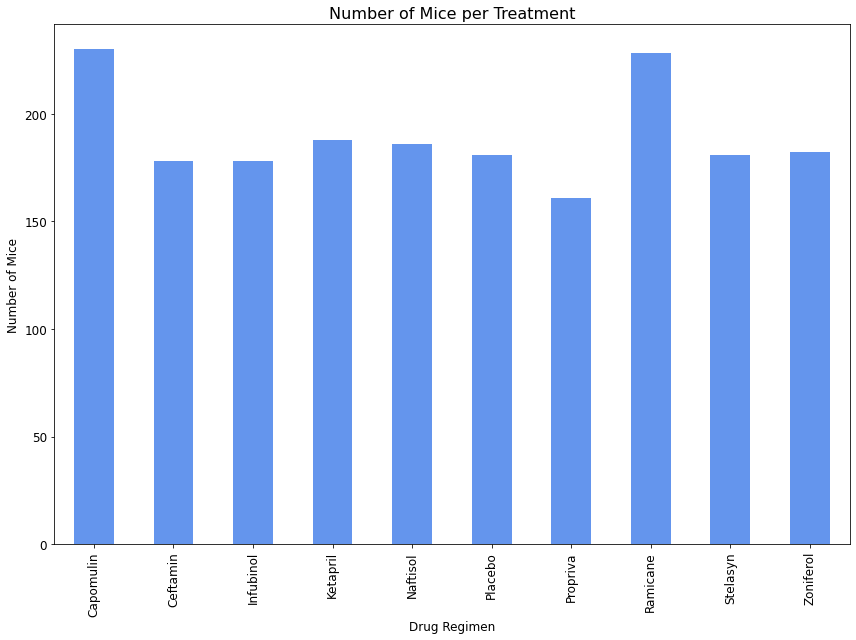

In [23]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
count_mice = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
["Mouse ID"]
count_mice
plot = count_mice.plot.bar(figsize = (12,9), color = "cornflowerblue", fontsize = 12)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Mice", fontsize = 12)
plt.title("Number of Mice per Treatment", fontsize = 16)
plt.tight_layout()
plt.savefig("count_mice.png")
plt.show
count_mice


In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
mice_list = (combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

<function matplotlib.pyplot.show(*args, **kw)>

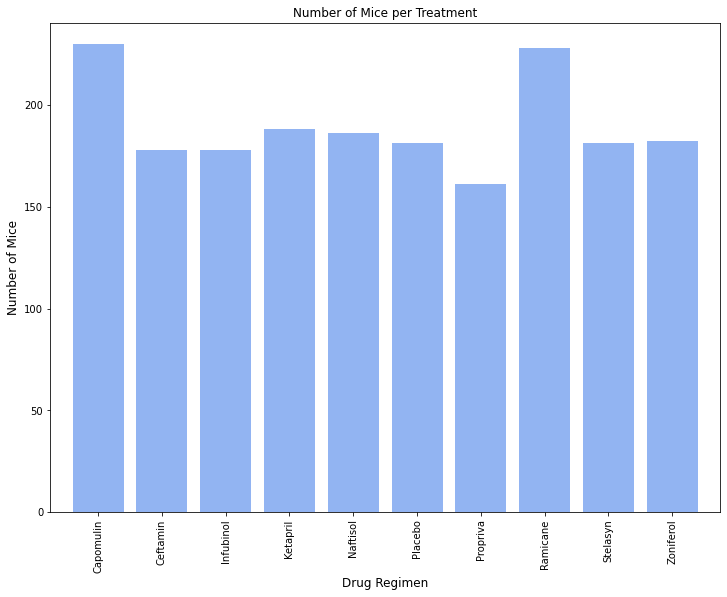

In [25]:
x_axis = np.arange(len(count_mice))
fig1, ax1 = plt.subplots(figsize= (12, 9))
plt.bar(x_axis, mice_list, color="cornflowerblue", alpha=0.7, align="center")

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_list)+10)
plt.title("Number of Mice per Treatment",fontsize = 12)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Mice", fontsize = 12)
bbox_inches = ("tight")
plt.savefig("mice_list.png")
plt.show

Pie Plots

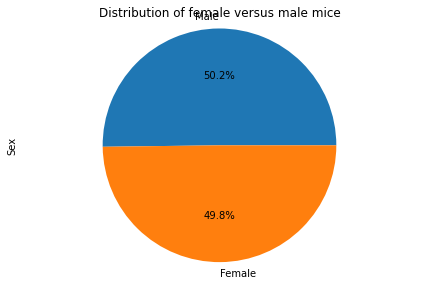

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_pie = mouse["Sex"].value_counts()
plt.figure()
mice_pie.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.savefig("mice_pie")
plt.show()



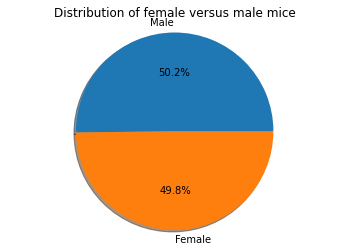

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["tab:blue","tab:orange"]
explode = (0,0)
plt.figure()
plt.pie(mice_pie.values, explode=explode, labels=mice_pie.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.savefig("femvsmale")
plt.show()

Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Capomulin
capomulin_one = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_one)
capomulin_merge = pd.merge(capomulin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

# Capomulin quartiles, IQR, outliers - upper and lower bounds
capomulin_q = capomulin_merge["Tumor Volume (mm3)"]

quartiles =capomulin_q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [29]:
# Ramicane
ramicane_two = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_two)
ramicane_merge = pd.merge(ramicane_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

# Ramicane quartiles, IQR, outliers - upper and lower bounds
ramicane_q = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ramicane_q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [30]:
# Infubinol 
infubinol_three = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_three)
infubinol_merge = pd.merge(infubinol_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

# Infubinol quartiles, IQR, outliers - upper and lower bounds
infubinol_q = infubinol_merge["Tumor Volume (mm3)"]

quartiles =infubinol_q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [31]:
# Ceftamin
ceftamin_four = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_four)
ceftamin_merge = pd.merge(ceftamin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

# Infubinol quartiles, IQR, outliers - upper and lower bounds

ceftamin_q =ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


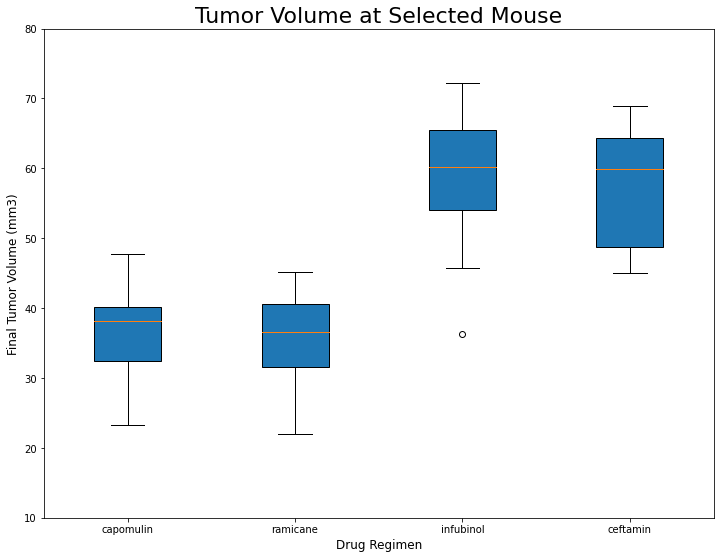

In [32]:
data_to_plot = [capomulin_q, ramicane_q, infubinol_q, ceftamin_q]
Regimen= ['capomulin', 'ramicane', 'infubinol','ceftamin']

fig1, ax1 = plt.subplots(figsize=(12, 9))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =22)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
bbox_inches = ("tight")
plt.savefig("quartilesiqr.png")
plt.show()

Line and Scatter Plots

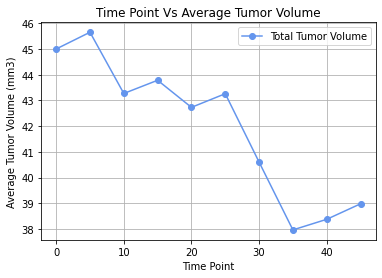

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_line = combined_data[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == "b128")]
cap_line = cap_line.groupby(["Drug Regimen", "Timepoint"])
cap_line_DataFrame = cap_line["Tumor Volume (mm3)"].mean().to_frame()
cap_lineIndexDataDF = cap_line_DataFrame.unstack(0)
cap_linePlotDF = cap_lineIndexDataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
cap_line_total, = plt.plot(xAxis, cap_linePlotDF["Capomulin"], marker= "o", color="cornflowerblue", label="Total Tumor Volume" )
plt.legend(handles=[cap_line_total], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.savefig("tpvstv")
plt.show()



<Figure size 432x288 with 0 Axes>

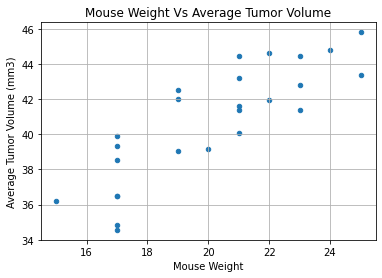

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_scat = combined_data[(combined_data["Drug Regimen"] == "Capomulin")]
cap_scat = cap_scat[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData = cap_scat.groupby(["Mouse ID","Weight (g)"])
cap_scatDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
cap_scatDF = cap_scatDF.reset_index()
cap_scatDF.head()

plt.figure()
cap_scatDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.savefig("mousewvsavgtv")
plt.show()


In [35]:
# Calculate the correlation coefficient and linear regression model 

In [36]:
correlation = st.pearsonr(cap_scatDF["Weight (g)"], cap_scatDF["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


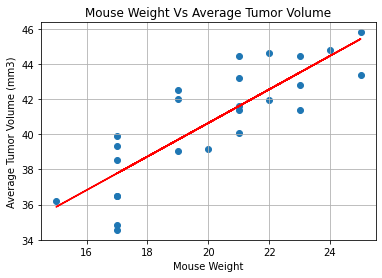

In [37]:
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_scatDF["Weight (g)"]
y_values = cap_scatDF["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.savefig("mousewvsavgtv2")
plt.show()

